In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = 'Dataset/'
train = pd.read_csv(filepath + 'Train.csv')
test = pd.read_csv(filepath + 'Test.csv')
dataDic = pd.read_csv(filepath + 'DataDictionary.csv')

In [3]:
train_bac = train.copy()
test_bac = test.copy()

In [4]:
test.head()

,sku_name,month,year,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN
0,YOSHTLYNYOSHZZ,11,2021,0,1,0
1,YOSHTLYNYOSHZZ,12,2021,0,1,0
2,YOSHTLYNYOSHZZ,1,2022,0,1,0
3,YOSHTLYNYOSHZZ,2,2022,0,1,0
4,YOSHRENECARL,11,2021,0,0,1


In [5]:
train.head()

,sku_name,starting_inventory,sellin,sellin_channel_1,sellin_channel_2,sellin_channel_3,sellin_channel_4,sellin_channel_5,sellin_channel_6,sellin_channel_7,...,month,year,product_lifecycle_stage,FLAG100,disc_month,cum_disc,CAT_GENDER_BOTH,CAT_GENDER_MEN,CAT_GENDER_WOMEN,Weeks
0,YOSHWARDTERR,0,1013,0,0,0,1013,0,0,0,...,7,2016,U,0.000000,0,0,0,1,0,1
1,YOSHWARDTERR,0,2026,0,0,0,2026,0,0,0,...,2,2017,U,0.000000,0,0,0,1,0,0
2,YOSHWARDTERR,0,1013,0,0,0,1013,0,0,0,...,5,2017,U,0.000000,0,0,0,1,0,0
3,YOSHUANEMARX,0,320108,4052,40520,240081,4052,6078,18234,0,...,4,2018,W,0.270966,1,1,0,0,1,1
4,YOSHUANEMARX,0,132703,2026,0,81040,3039,25325,18234,0,...,5,2018,W,0.063004,0,1,0,0,1,0


In [6]:
test.columns

Index(['sku_name', 'month', 'year', 'CAT_GENDER_BOTH', 'CAT_GENDER_MEN',
       'CAT_GENDER_WOMEN'],
      dtype='object')

In [7]:
train.columns

Index(['sku_name', 'starting_inventory', 'sellin', 'sellin_channel_1',
       'sellin_channel_2', 'sellin_channel_3', 'sellin_channel_4',
       'sellin_channel_5', 'sellin_channel_6', 'sellin_channel_7',
       'sellin_channel_8', 'sellout', 'onhand_inventory', 'leftover_inventory',
       'sellout_channel_1', 'sellout_channel_2', 'sellout_channel_3',
       'sellout_channel_4', 'sellout_channel_5', 'sellout_channel_6',
       'sellout_channel_7', 'sellout_channel_8', 'sellout_channel_9',
       'sellout_channel_10', 'onhand_inventory_channel_1',
       'onhand_inventory_channel_2', 'onhand_inventory_channel_3',
       'onhand_inventory_channel_4', 'onhand_inventory_channel_5',
       'onhand_inventory_channel_6', 'onhand_inventory_channel_7',
       'onhand_inventory_channel_8', 'onhand_inventory_channel_9',
       'onhand_inventory_channel_10', 'price', 'month', 'year',
       'product_lifecycle_stage', 'FLAG100', 'disc_month', 'cum_disc',
       'CAT_GENDER_BOTH', 'CAT_GENDER_MEN',

<AxesSubplot:>

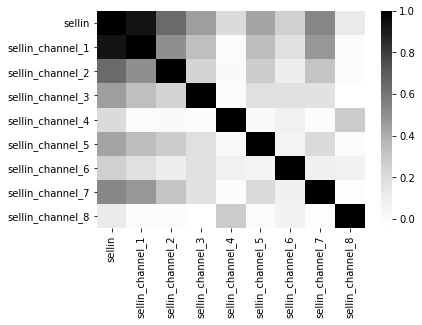

In [8]:
sellin_cols = ['sellin', 'sellin_channel_1',
       'sellin_channel_2', 'sellin_channel_3', 'sellin_channel_4',
       'sellin_channel_5', 'sellin_channel_6', 'sellin_channel_7',
       'sellin_channel_8']# + list(test.columns)
sns.heatmap(train[sellin_cols].corr(),cmap='Greys')

In [9]:
train[sellin_cols].corr()[train[sellin_cols].corr().mean()>0.3]

,sellin,sellin_channel_1,sellin_channel_2,sellin_channel_3,sellin_channel_4,sellin_channel_5,sellin_channel_6,sellin_channel_7,sellin_channel_8
sellin,1.000000,0.934619,0.644332,0.453059,0.206730,0.430291,0.260087,0.531310,0.119088
sellin_channel_1,0.934619,1.000000,0.504755,0.338491,-0.010130,0.347477,0.177517,0.476426,-0.004022
sellin_channel_2,0.644332,0.504755,1.000000,0.242143,-0.003514,0.273330,0.098772,0.317326,-0.013154
sellin_channel_7,0.531310,0.476426,0.317326,0.165568,-0.013805,0.213250,0.089392,1.000000,-0.021555


<AxesSubplot:>

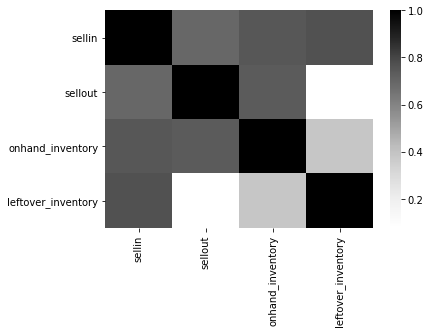

In [10]:
gen_inv_cols = ['sellin', 'sellout', 'onhand_inventory', 'leftover_inventory']# + list(test.columns)
sns.heatmap(train[gen_inv_cols].corr(),cmap='Greys')

In [11]:
train.sku_name.str.len().value_counts()

12    35104
11     6617
14     2214
13      533
10      439
Name: sku_name, dtype: int64

In [12]:
train=train_bac

In [13]:
coll = []

def func1(x):
    counter = [0 for i in range(26)]
    for i in x:
        counter[ord(i)-65] = 1
    coll.append(counter)
    return x

train.sku_name.apply(func1)

name_df = pd.DataFrame(coll,columns=['name_'+chr(65+i) for i in range(26)])

name_df.columns

Index(['name_A', 'name_B', 'name_C', 'name_D', 'name_E', 'name_F', 'name_G',
       'name_H', 'name_I', 'name_J', 'name_K', 'name_L', 'name_M', 'name_N',
       'name_O', 'name_P', 'name_Q', 'name_R', 'name_S', 'name_T', 'name_U',
       'name_V', 'name_W', 'name_X', 'name_Y', 'name_Z'],
      dtype='object')

In [14]:
coll = []

def func1(x):
    counter = [0 for i in range(26)]
    for i in x:
        counter[ord(i)-65] += 1
    coll.append(counter)
    return len(x)

train['sku_name_count'] = train.sku_name.apply(func1)

names_df = pd.DataFrame(coll,columns=['names_'+chr(65+i) for i in range(26)])

names_df.columns

Index(['names_A', 'names_B', 'names_C', 'names_D', 'names_E', 'names_F',
       'names_G', 'names_H', 'names_I', 'names_J', 'names_K', 'names_L',
       'names_M', 'names_N', 'names_O', 'names_P', 'names_Q', 'names_R',
       'names_S', 'names_T', 'names_U', 'names_V', 'names_W', 'names_X',
       'names_Y', 'names_Z'],
      dtype='object')

In [15]:
train = pd.concat([train,name_df,names_df],axis=1)

In [16]:
def get_train_test_sets(data,features,label,test_size=.2):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test = train_test_split(data[features],data[label],test_size=test_size,random_state=44)
    return X_train,X_test,y_train,y_test

features = (['sku_name_count']+
            list(name_df.columns)+
            list(names_df.columns)+
            ['month','year']+
            ['CAT_GENDER_BOTH', 'CAT_GENDER_MEN','CAT_GENDER_WOMEN'])

X_train,X_test,y_train,y_test = get_train_test_sets(train,features,'sellin')

In [ ]:
from sklearn.ensemble import RandomForestRegressor as RFR

reg1 = RFR(random_state=74,criterion='mae')

reg1.fit(X_train,y_train)

In [ ]:
y_pred = reg1.predict(X_test)

from sklearn.metrics import mean_absolute_error as mae_

mae_(y_pred,y_test)

In [19]:
X_train.shape

(35925, 58)

207232.10090334452 - []
207141.68024162986 - [cats]
174349.93687730117 - [dates]
173522.81399498135 - [dates] + [cats]

## To make Predictions now!

In [20]:
reg2 = RFR(random_state=74)

reg2.fit(train[features],train['sellin'])

RandomForestRegressor(random_state=74)

In [21]:
coll_test = []

def func2(x):
    counter = [0 for i in range(26)]
    for i in x:
        counter[ord(i)-65] = 1
    coll_test.append(counter)
    return x

test.sku_name.apply(func2)

name_test_df = pd.DataFrame(coll_test,columns=['name_'+chr(65+i) for i in range(26)])

coll_test = []

def func2(x):
    counter = [0 for i in range(26)]
    for i in x:
        counter[ord(i)-65] += 1
    coll_test.append(counter)
    return len(x)

test['sku_name_count'] = test.sku_name.apply(func2)

names_test_df = pd.DataFrame(coll_test,columns=['names_'+chr(65+i) for i in range(26)])

test.shape,names_test_df.shape

((1528, 7), (1528, 26))

In [22]:
#test = test_bac
test = pd.concat([test,name_test_df,names_test_df],axis=1)
test.shape

(1528, 59)

In [23]:

#features_test = list(names_test_df.columns)+['month','year']+['CAT_GENDER_BOTH', 'CAT_GENDER_MEN','CAT_GENDER_WOMEN']

predictions = reg2.predict(test[features])

In [24]:
test['ID'] = test.sku_name+'_'+test.month.astype('string')+'_'+test.year.astype('string')

In [25]:
result = pd.DataFrame({
    'Item_ID':test.ID,
    'Target':predictions
})
result=result.set_index('Item_ID')

result.to_csv('submission_version2_03.csv')


In [38]:
reg2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 74,
 'verbose': 0,
 'warm_start': False}

In [37]:
reg1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 74,
 'verbose': 0,
 'warm_start': False}